<a href="https://colab.research.google.com/github/yusrizaltomo/uas-pcd-face-recognition/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!git clone https://github.com/yusrizaltomo/uas-pcd-face-recognition.git

fatal: destination path 'uas-pcd-face-recognition' already exists and is not an empty directory.


In [26]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [27]:
haar_cascade = cv.CascadeClassifier('uas-pcd-face-recognition/haar_face.xml')

In [28]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

In [29]:
# features = np.load('features.npy', allow_pickle=True)
# labels = np.load('labels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('uas-pcd-face-recognition/face_trained.yml')

In [30]:
# img = cv.imread(r'uas-pcd-face-recognition/img/test/elton_john/1.jpg')
# img = cv.imread(r'uas-pcd-face-recognition/img/test/madonna/4.jpg')
img = cv.imread(r'uas-pcd-face-recognition/img/test/ben_afflek/5.jpg')

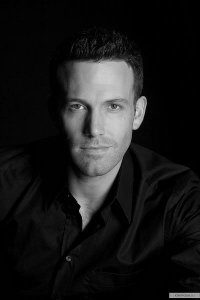

In [31]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [32]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

Label = Ben Afflek with a confidence of 94.11855589200476


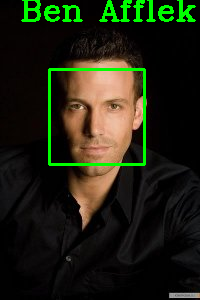

In [33]:
cv2_imshow(img)